

# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

>**Questions:**
><li>Which genres are most popular from year to year?</li>
><li>What kinds of properties are associated with movies that have high revenues?</li>
><li>Is moives with high budget has a high rates?</li>
><li>Is moives with high budget gives high revenues?</li>

In [1]:
#  import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section I loading the data, check for cleanliness, and then trim and clean my dataset for analysis.

### General Properties

In [2]:
# Load my data and show the shape
df=pd.read_csv('tmdb-movies.csv')
df.shape

(10866, 21)

In [3]:
# show simple of data.
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
#show information about type of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#show number of missing data in each columns
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>Most columns are represented by correct data types except release_year and release_date columns, we have some null values in some columns but only one of them is in the centre of our analysis which is genres. we will investigate this null values.

In [6]:
#show if has duplicated data 
df.duplicated().sum()

1

In [7]:
# show some of statistic information about my data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**we can find some information in describe data such as:**
><li>more than 50% of movies after 2006 , we will show it in graph to be more obvious </li>
><li>some of movies has zero (budget, revenue, runtime) which is not logic data so we need cleaned and corrected it </li>

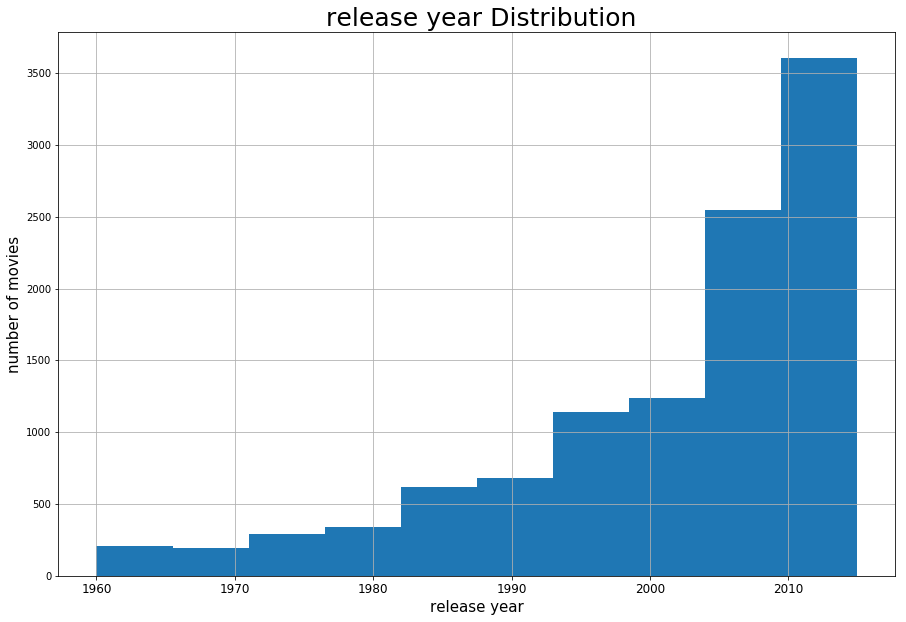

In [8]:
#draw graph for release year of movies to be data more obvious 
df.release_year.hist(figsize=(15,10)).plot(kind = 'bar');
plt.title(' release year Distribution', size=25)
plt.xlabel("release year", size=15)
plt.xticks(size=12)
plt.ylabel("number of movies", size=15);



### Data Cleaning (Remove duplicated Data, Remove unnecessary columns, fix structure)

>After discussing the structure of the data and any problems that need to be cleaned, I perform those cleaning steps in the  part of this Report.

>**Data Structure**
Before working with this data I check this database and I fix structure,found the missing values, duplicated Data,and unnecessary data. 
>**The Cleaning Process**
><li>I removed duplicated Data</li>
><li>I removed unnecessary columns ('cast','id','imdb_id','homepage','tagline','vote_count', 'keywords','overview', 'budget',
 'runtime','revenue','production_companies') to improve database redability.</li>
><li>I clean the Null value </li>
><li>I casted release_date from string to date datatype, and casted release_year from int to string datatype.</li>
><li>I check and corrected not logic data such as zero (budget, revenue, runtime).</li>

In [9]:
#Remove duplicates data
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
#Remove unnecessary columns
df=df.drop(['cast','id','imdb_id','homepage','tagline','vote_count', 'keywords','overview', 'budget', 'runtime','revenue','production_companies'], axis=1)
df.head(1)

,popularity,original_title,director,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09


In [11]:
df.shape

(10865, 9)

In [12]:
#show number of missing data in each columns
df.isnull().sum()

popularity         0
original_title     0
director          44
genres            23
release_date       0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

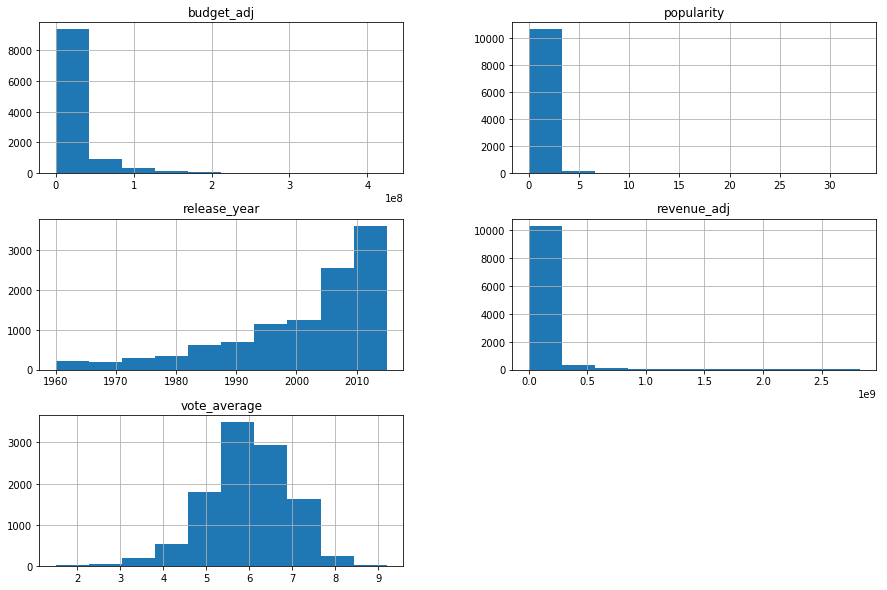

In [13]:
#show hist graph for my data befor delete missing data 
df.hist(figsize=(15,10));

In [14]:
df[df.genres.isnull()].describe()

,popularity,vote_average,release_year,budget_adj,revenue_adj
count,23.000000,23.000000,23.000000,23.000000,23.0
mean,0.167966,6.421739,2004.652174,1220.949640,0.0
std,0.126428,1.231760,12.470360,5855.468772,0.0
min,0.020701,3.000000,1970.000000,0.000000,0.0
25%,0.075151,5.850000,2000.500000,0.000000,0.0
50%,0.130018,6.700000,2010.000000,0.000000,0.0
75%,0.246796,7.100000,2012.500000,0.000000,0.0
max,0.520520,8.500000,2015.000000,28081.841720,0.0


> I will removed any row has missed data, because the most information in this row = null or 0 which is not useful so I deleted it  

In [15]:
#Remove missing data
df = df.dropna()
df.shape

(10800, 9)

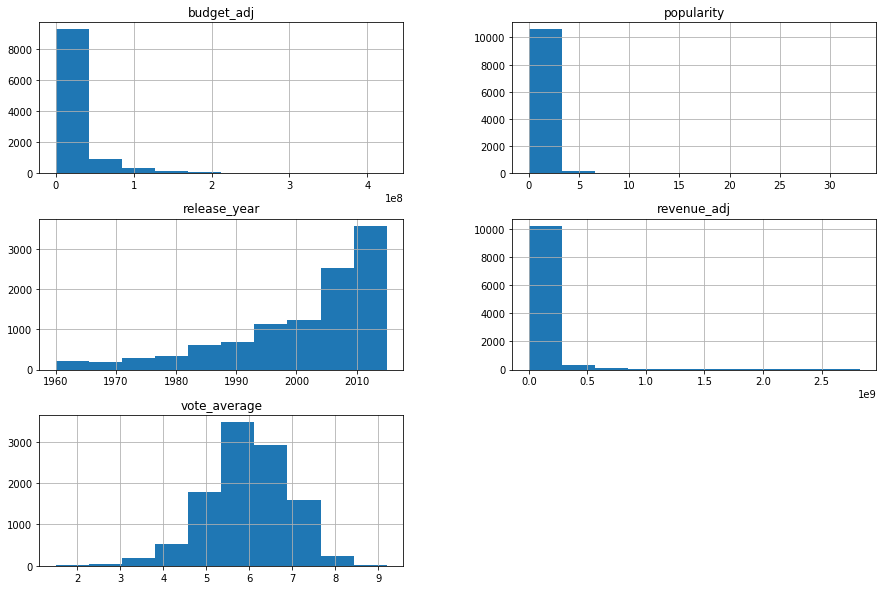

In [16]:
#show hist graph for my data after delete missing data 
df.hist(figsize=(15,10));

In [17]:
df.isnull().sum()

popularity        0
original_title    0
director          0
genres            0
release_date      0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10800 non-null float64
original_title    10800 non-null object
director          10800 non-null object
genres            10800 non-null object
release_date      10800 non-null object
vote_average      10800 non-null float64
release_year      10800 non-null int64
budget_adj        10800 non-null float64
revenue_adj       10800 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 843.8+ KB


In [19]:
# Convert release_date (object datatype) to date.
df['release_date'] = pd.to_datetime(df['release_date'])

In [20]:
# Convert release_year (int datatype) to string.
df["release_year"]=df["release_year"].astype(str)

In [21]:
#check if budget less than or equal 0 which is not logic data 
df.query('budget_adj<=0').original_title.count()

5636

In [22]:
#check if revenue less than or equal 0 which is not logic data
df.query('revenue_adj <= 0').original_title.count()

5952

more than 50% of data has 0 budget and revenue so I can't remove it and I can't fill if so I work with data as it as

<a id='eda'></a>
## Exploratory Data Analysis

> **After cleaning dataset Now I will analyze it to answer Questions by looking at the genres of movies and it's relations with other variables.**

### Which genres are most popular from year to year?

In [23]:
#splitting genres rows in separate data frame
df_genres=pd.DataFrame(data=df["genres"].str.split('|').tolist(),index=[df["release_year"],df["popularity"]]).stack() 
df_genres=df_genres.reset_index([0,1])
#renaming genres column
df_genres.rename(mapper={0:'genres'},axis=1,inplace=True)  
df_genres.head(3)

,release_year,popularity,genres
0,2015,32.985763,Action
1,2015,32.985763,Adventure
2,2015,32.985763,Science Fiction


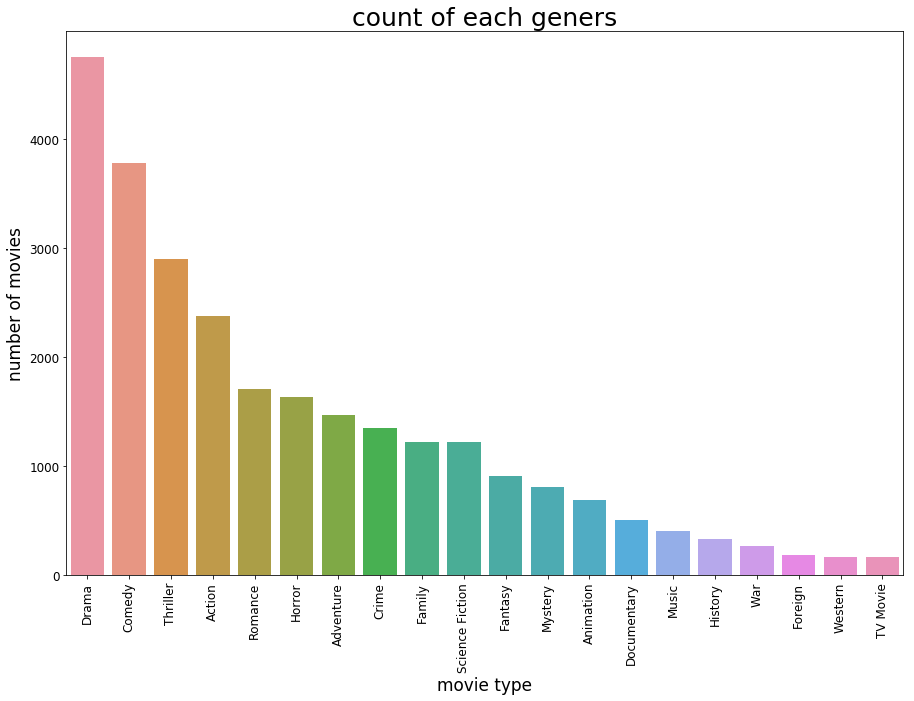

In [24]:
#Draw graph represent count of movies' in each genres
x=df_genres.genres.value_counts().index
y=df_genres.genres.value_counts().values

plt.figure(figsize=(15,10));
sns.barplot(x,y);
plt.title('count of each geners',size=25);
plt.xlabel('movie type',size=17);
plt.ylabel('number of movies',size=17);
plt.xticks(size=12,rotation=90)
plt.yticks(size=12);


In [25]:
#divide into decades
df_genres.release_year=df_genres.release_year.apply(lambda x: x[:3]+'0')
#creating data frame grouped by decades and genres
df_genres_popularity=pd.DataFrame(df_genres.groupby(['release_year','genres'],as_index=False).popularity.sum())
df_genres_popularity.head()

,release_year,genres,popularity
0,1960,Action,41.238437
1,1960,Adventure,46.677670
2,1960,Animation,12.542853
3,1960,Comedy,46.263752
4,1960,Crime,20.421047


In [26]:
#Draw graph represent count of movies' in each genres and  each decades
# I used this link to help me in Draw this plots: https://bit.ly/3hGzTNE

df_genres1=df_genres_popularity.query("release_year== '1960'")
df_genres2=df_genres_popularity.query("release_year== '1970'")
df_genres3=df_genres_popularity.query("release_year== '1980'")
df_genres4=df_genres_popularity.query("release_year== '1990'")
df_genres5=df_genres_popularity.query("release_year== '2000'")
df_genres6=df_genres_popularity.query("release_year== '2010'")
df_genres1.head()
df_list=[df_genres1, df_genres2, df_genres3, df_genres4, df_genres5, df_genres6]
s=df_genres1.groupby(df_genres1['genres'].unique())

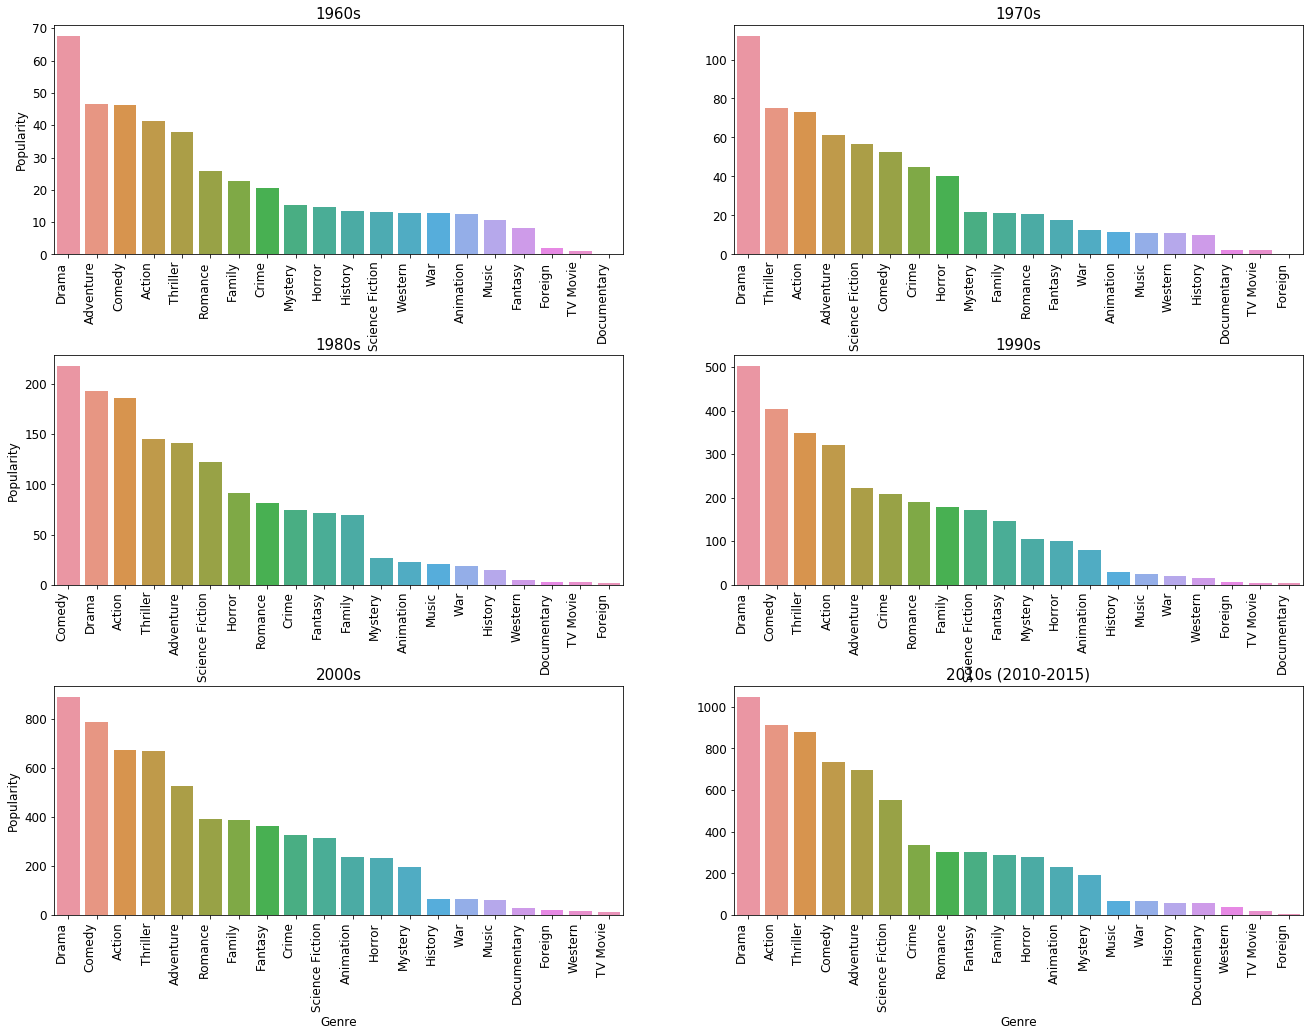

In [27]:
fig, axes = plt.subplots(3, 2,figsize=(20,15))
plt.xticks(size=12,rotation='vertical')
fig.tight_layout(pad=8)
count=0
for row in range(3):
    for col in range(2):
        ax=sns.barplot( x='genres',y='popularity',data=df_list[count],ax=axes[row,col],\
                       order=df_list[count].sort_values('popularity',ascending=False).genres)
        
        if df_list[count].release_year.unique()[0] != '2010':
            ax.set_title(df_list[count].release_year.unique()[0] + "s",size=15)
        else:
            ax.set_title(df_list[count].release_year.unique()[0] + "s"+ " (2010-2015)",size=15)
            
        if col != 0:
            ax.set_ylabel("")
        else:
            ax.set_ylabel("Popularity", size=12)    
        ax.set_xlabel('Genre',size=12)
        ax.tick_params(labelsize=12 ,rotation=0)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
        count+=1


**Popularity is growing in every decade and the genres that most frequently entered the top 5 terms of popularity in each decade:**
><li>Drama</li>
><li>Comedy</li>
><li>Thriller</li>
><li>Action</li>
><li>Adventure</li>
>Drama is the most popular genre in all decades except in 1980s , Comedy has most popular in this decades .

### What kinds of properties are associated with movies that have high revenues?

In [28]:
#I tack top 1000 high revenue to analysis it 
df_high_revenue = df.sort_values(by='revenue_adj',ascending = False)
df_high_revenue=df_high_revenue[0:1000]
kinds_of_properties =df_high_revenue.genres.str.split('|',expand=True)
kinds_of_properties.head(1)



,0,1,2,3,4
1386,Action,Adventure,Fantasy,Science Fiction,None


In [29]:
count_kinds = kinds_of_properties[0].value_counts()
for x in range(1,5):
    z = kinds_of_properties[x].value_counts()
    count_kinds = count_kinds.add(z, fill_value=0)    


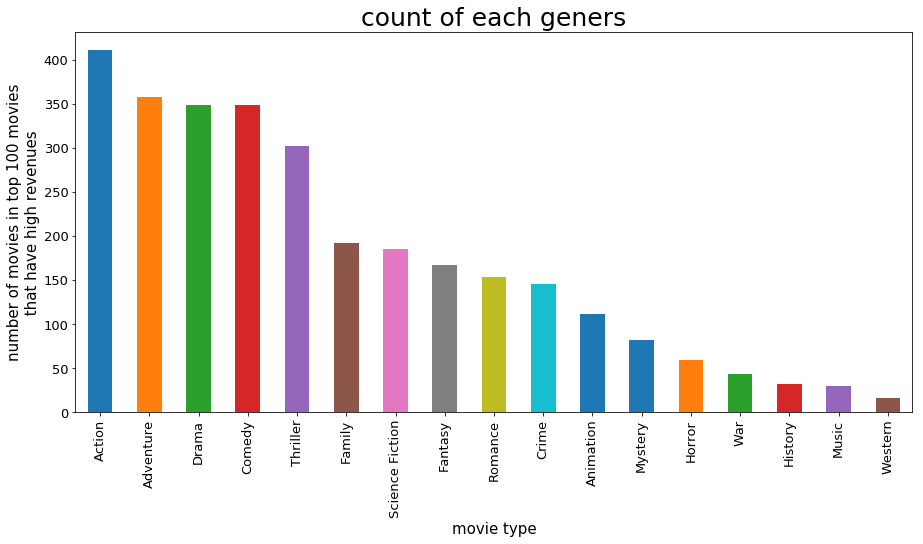

In [30]:
count_kinds = count_kinds.sort_values(ascending = False)
count_kinds.plot(kind = 'bar',figsize=(15,7), fontsize=13 )
plt.title('count of each geners',size=25)
plt.xlabel("movie type", size=15 )
plt.ylabel("number of movies in top 100 movies\n that have high revenues ", size=15);

>**the chart show the genres of the most top 1000 high revenue movies**

<a id='conclusions'></a>
## Conclusions
>**In this project we analyesd TMDB 1000 Movies**. more than 50% of movies after 2006 .
in first we exploration and clean our data to be able to work.
Then we extract some data which can help us to answer some questions which can help us to understand this data.
at last we analsys our data  and represent this analsys by some of chart and table to obvious our result to help in answer on our questions.

>**we found that we have 20 genres in our data, some of genres has more frequently occurring than others.**
**the top 5 higher frequently genres are:**
><li>Drama</li>
><li>Comedy</li>
><li>Thriller</li>
><li>Action</li>
><li>Romance</li>
>The most frequently five geners from year to year is drama , comedy thriller, action and romance.

>**Popularity is growing in every decade and the genres that most frequently entered
the top 5 terms of popularity in each decade:**
><li>Drama</li>
><li>Comedy</li>
><li>Thriller</li>
><li>Action</li>
><li>Adventure</li>
>Drama is the most popular genre in all decades except in 1980s , Comedy has most popular in this decades .
>The most popular five geners from year to year is drama , comedy thriller, action and Adventure.

>**the top 5 genres of the most top 1000 high revenue movies is:**
><li>Action</li>
><li>Adventure</li>
><li>Drama</li>
><li>Comedy</li>
><li>Thriller</li>
>The most high revenue five geners is Action , Adventure, Drama, Comedy and Thriller.

>**Issues**
><li>we have 1 duplicates data so I removed it </li>
><li>we have 23 missed data in geners, I removed any row has missed data , because the most information in this row = null or 0 which is not useful so I deleted it</li>
><li>more than 50% of data has 0 budget and revenue , I can't remove it and I can't fill if so I worked with data as it as</li>


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0